# Example - Customize the μs-ALEX histogram

*This notebook is part of smFRET burst analysis software [FRETBursts](http://opensmfs.github.io/FRETBursts/).*

> In this notebook shows how to plot different styles of μs-ALEX histograms and $E$ and $S$ marginal distributions.
> For a complete tutorial on burst analysis see 
> [FRETBursts - us-ALEX smFRET burst analysis](FRETBursts - us-ALEX smFRET burst analysis.ipynb).

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.6.5+5.g5243bc2).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [2]:
sns = init_notebook(apionly=True)
print('seaborn version: ', sns.__version__)

seaborn version:  0.8.0


In [3]:
# Tweak here matplotlib style
import matplotlib as mpl
mpl.rcParams['font.sans-serif'].insert(0, 'Arial')
mpl.rcParams['font.size'] = 12
%config InlineBackend.figure_format = 'retina'

# Get and process data

In [4]:
url = 'http://files.figshare.com/2182601/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'
download_file(url, save_dir='./data')
full_fname = "./data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5"

d = loader.photon_hdf5(full_fname)
loader.alex_apply_period(d)
d.calc_bg(bg.exp_fit, time_s=1000, tail_min_us=(800, 4000, 1500, 1000, 3000))
d.burst_search(L=10, m=10, F=6)
ds = d.select_bursts(select_bursts.size, add_naa=True, th1=30)

URL:  http://files.figshare.com/2182601/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
File: 0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
 
File already on disk: /Users/anto/src/FRETBursts/notebooks/data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5 
Delete it to re-download.


# Total photons (after ALEX selection):     2,259,522
#  D  photons in D+A excitation periods:      721,537
#  A  photons in D+A excitation periods:    1,537,985
# D+A photons in  D  excitation period:     1,434,842
# D+A photons in  A  excitation period:       824,680

 - Calculating BG rates ... 

[DONE]


 - Performing burst search (verbose=False) ...

[DONE]


 - Calculating burst periods ...

[DONE]


 - Counting D and A ph and calculating FRET ... 


   - Applying background correction.


   [DONE Counting D/A]


# ALEX joint plot

The `alex_jointplot` function allows plotting an ALEX histogram with marginals.
This is how it looks by default:

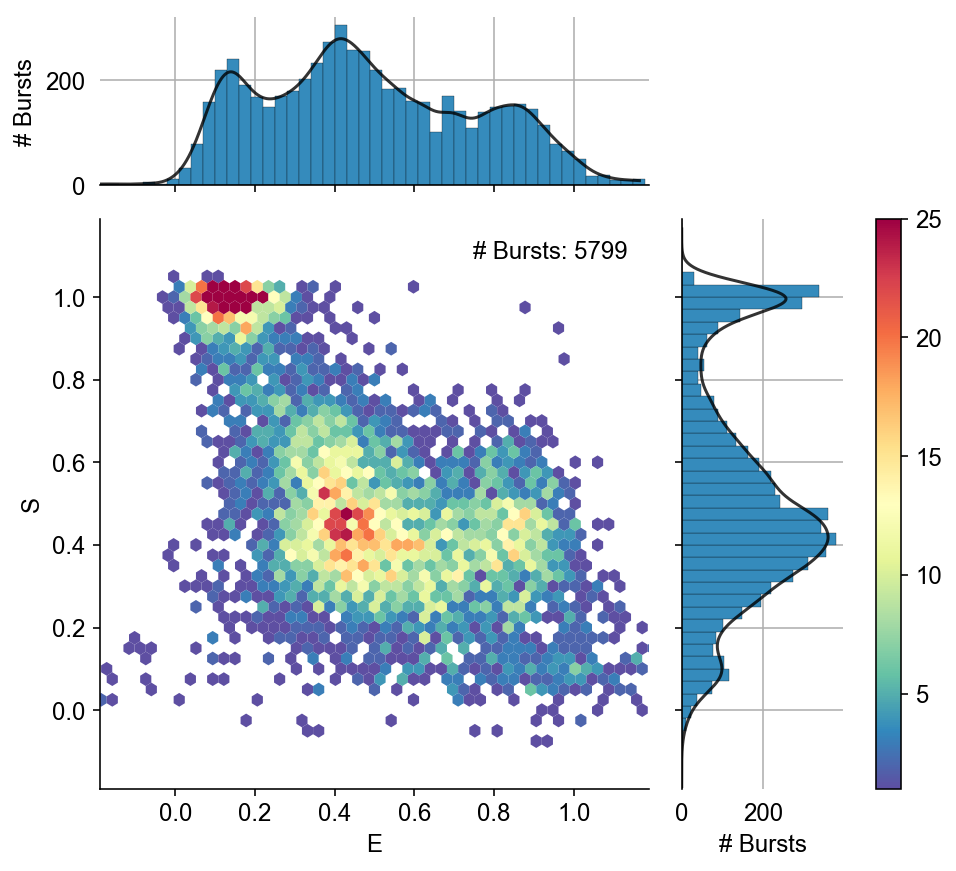

In [5]:
alex_jointplot(ds)

The inner plot in an hexbin plot, basically a 2D histogram with hexagonal bins.
This kind of histograms resembles a scatter plot when sample size is small,
and is immune from grid artifacts typical of rectangular grids.
For more info for hexbin see [this document](doi.org/10.1371/journal.pone.0160716.s004).

The marginal plots are histograms with an overlay KDE plot. 
The same FRETBursts function that plots standalone *E* and *S* histograms 
is used here to plot the marginals in the joint plot.

Below I show how to customize appearance and type of this plot.

## Changing colors

By default the colormap range is computed on the range S=[0.2, 0.8],
so that the FRET populations (S ~ 0.5) have more contrast.

To normalize the colormap to the whole data use the `vmax` argument:

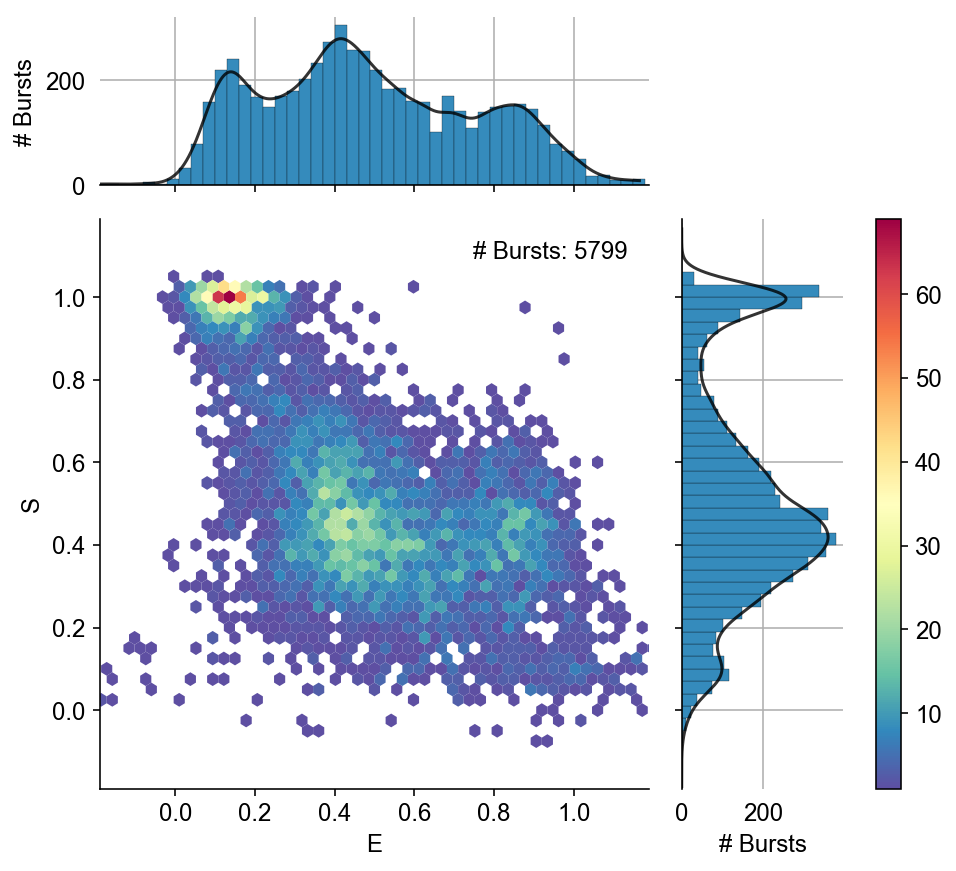

In [6]:
alex_jointplot(ds, vmax_fret=False)

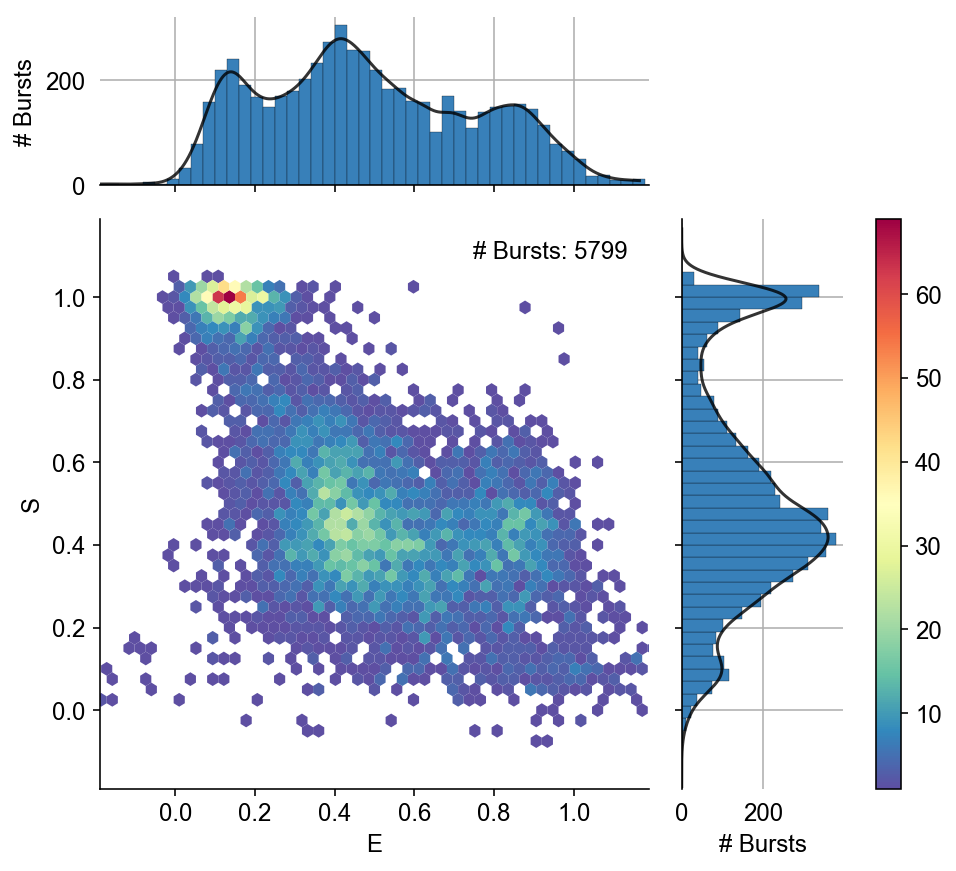

In [7]:
alex_jointplot(ds, vmax_fret=False, marginal_color=8)

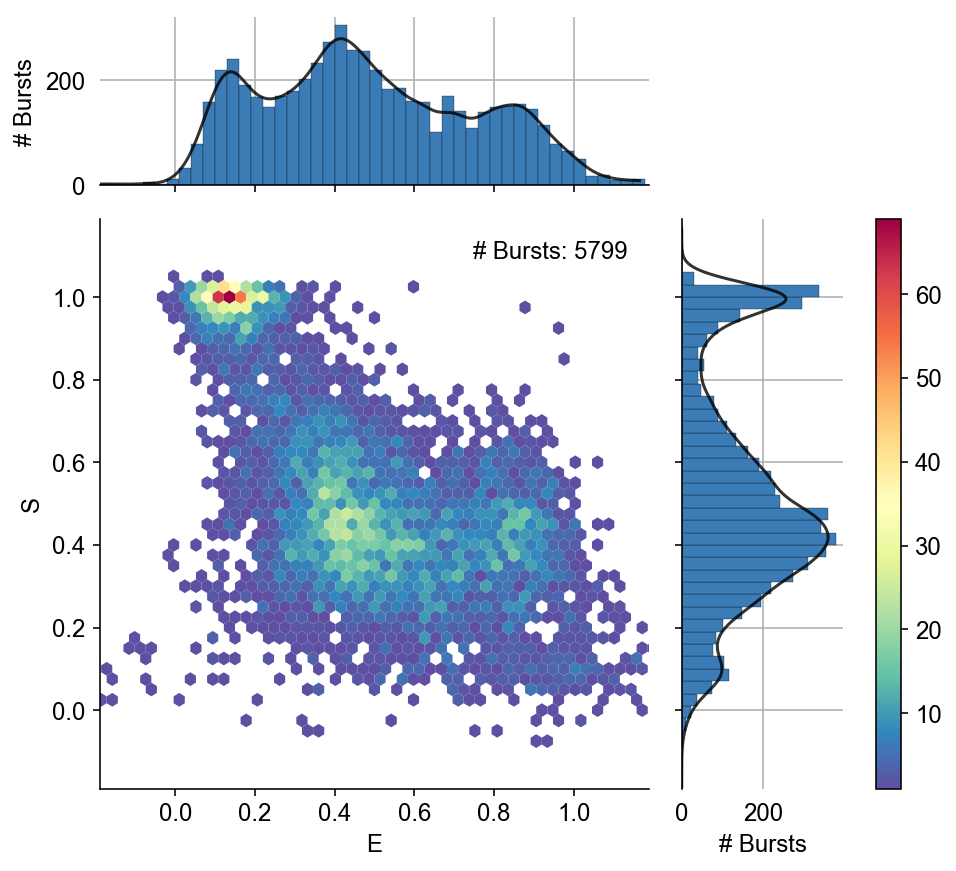

In [8]:
alex_jointplot(ds, vmax_fret=False, marginal_color=7)

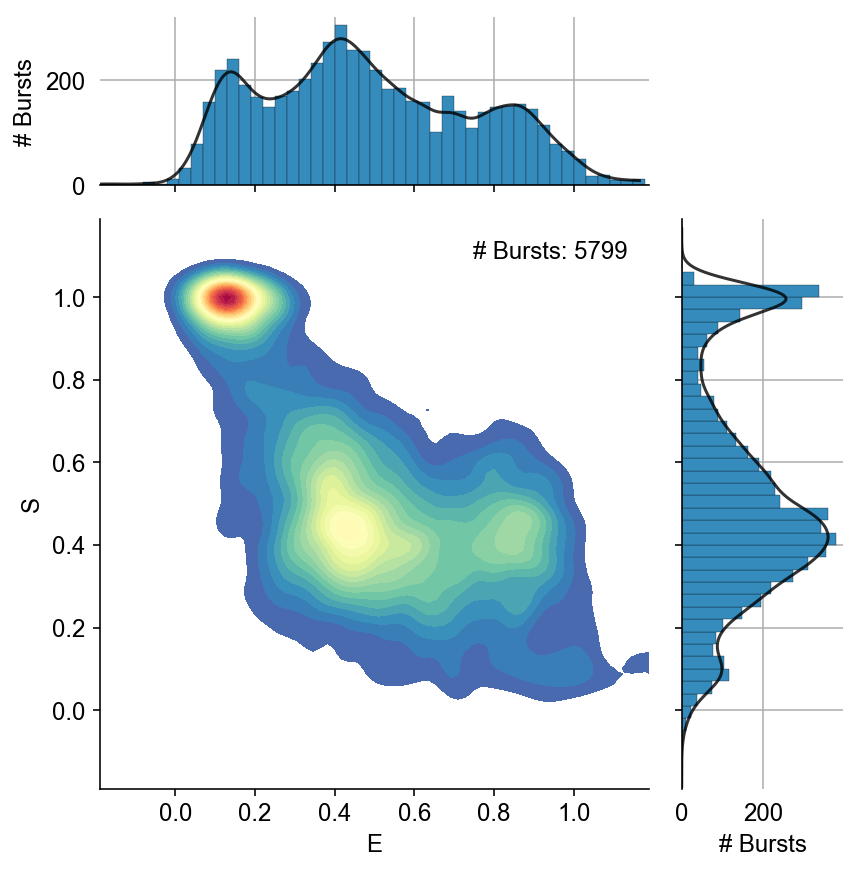

In [9]:
alex_jointplot(ds, kind='kde')

Or you can manually choose the max value mapped by the colormap (`vmax`):

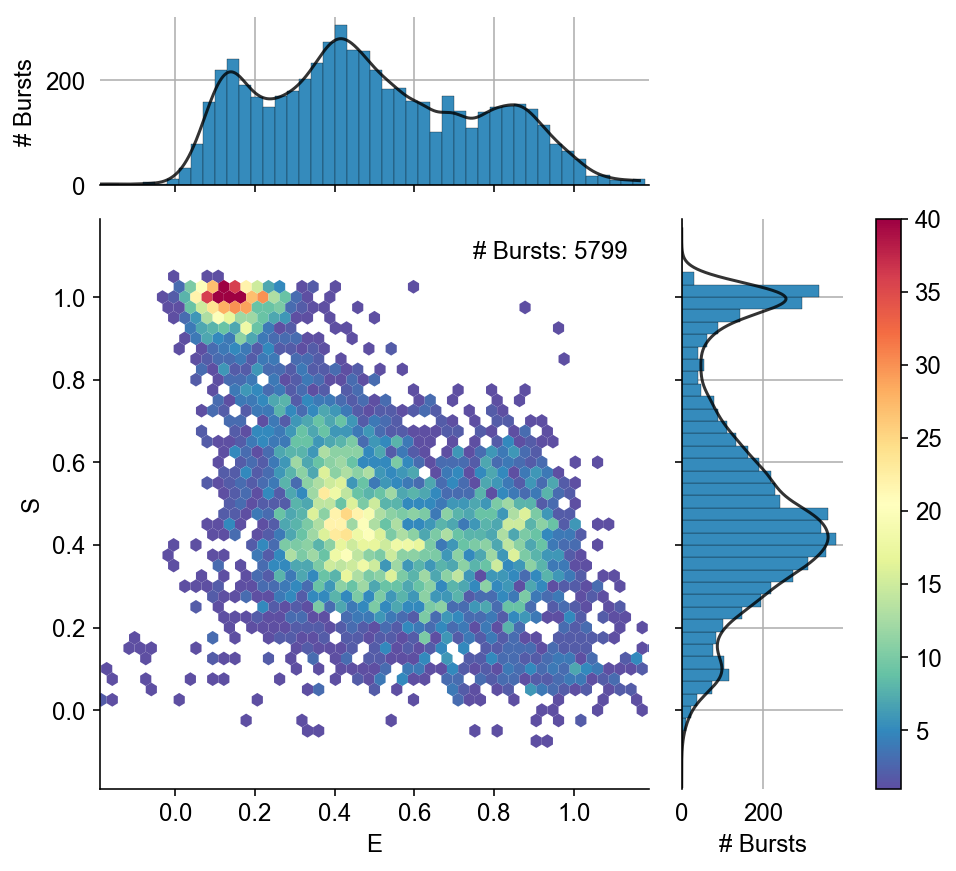

In [10]:
alex_jointplot(ds, vmax=40)

Changing the colormap will affect both inner and marginal plots:

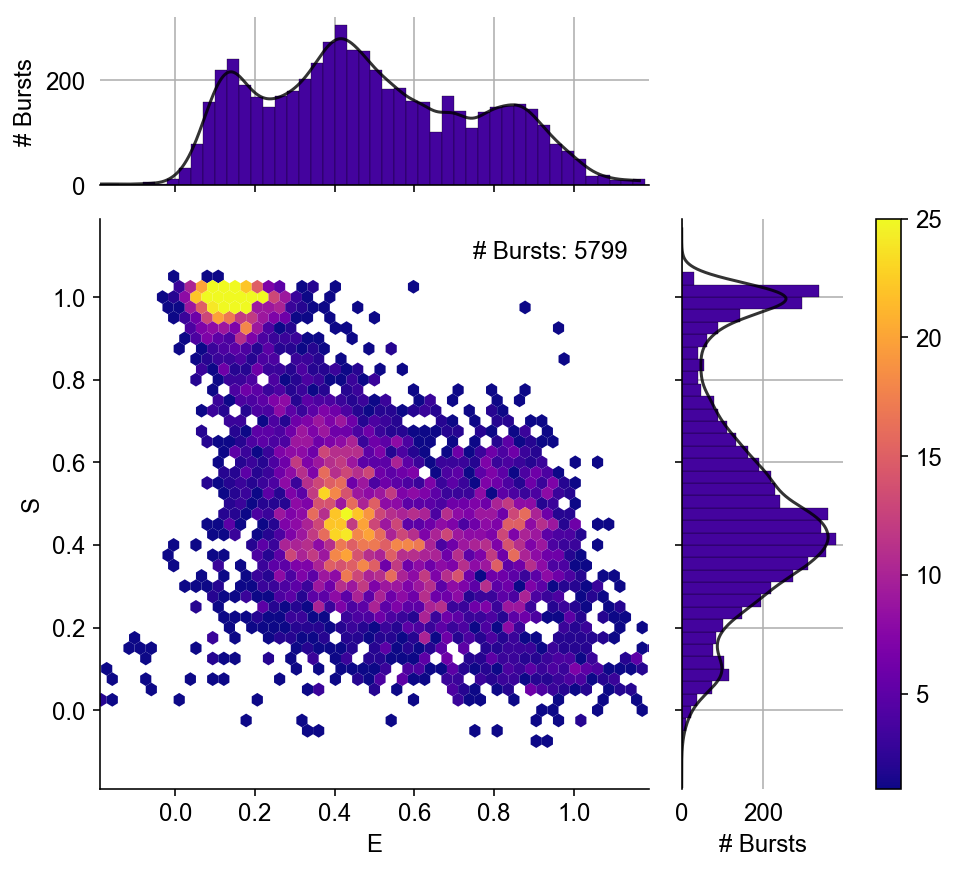

In [11]:
alex_jointplot(ds, cmap='plasma')

To pick a different color from the colormap for the marginal histograms use `histcolor_id`:

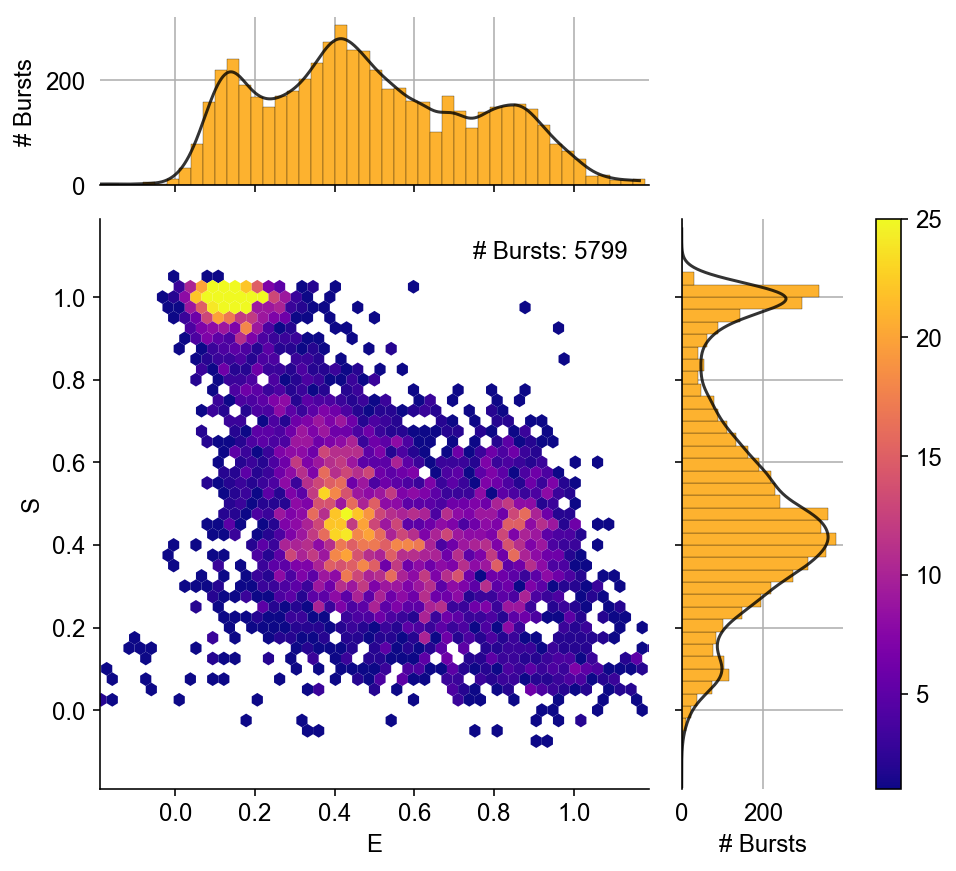

In [12]:
alex_jointplot(ds, cmap='plasma', marginal_color=83)

## Kinds of joint-plots

The inner plot can be changed to a scatter plot or a [KDE plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html):

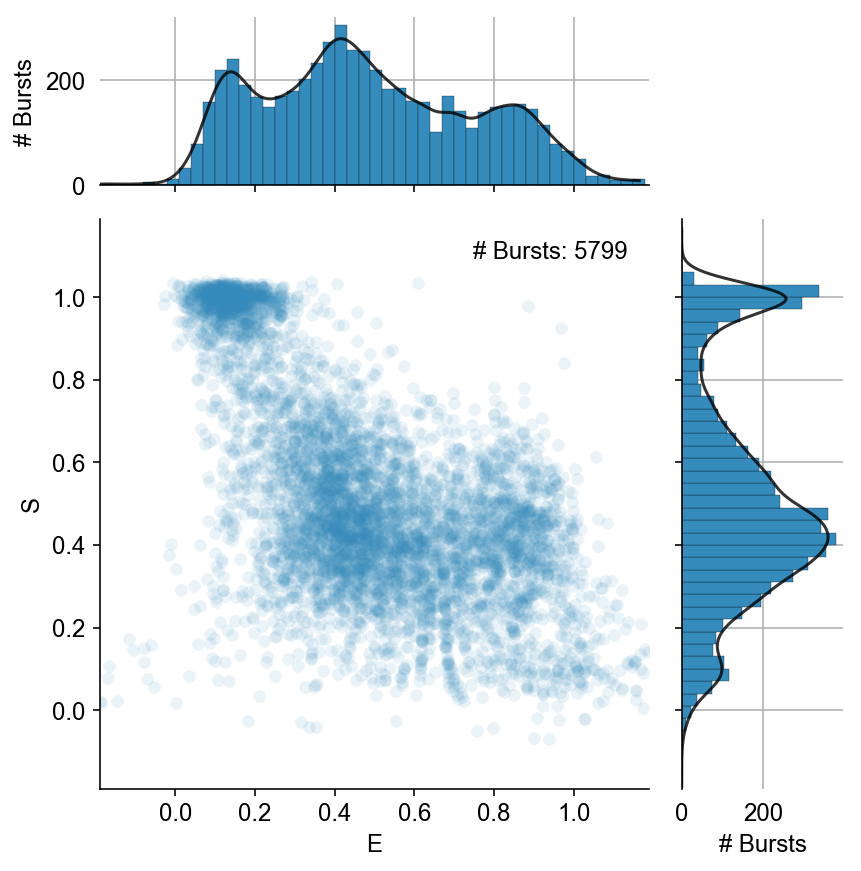

In [13]:
alex_jointplot(ds, kind='scatter')

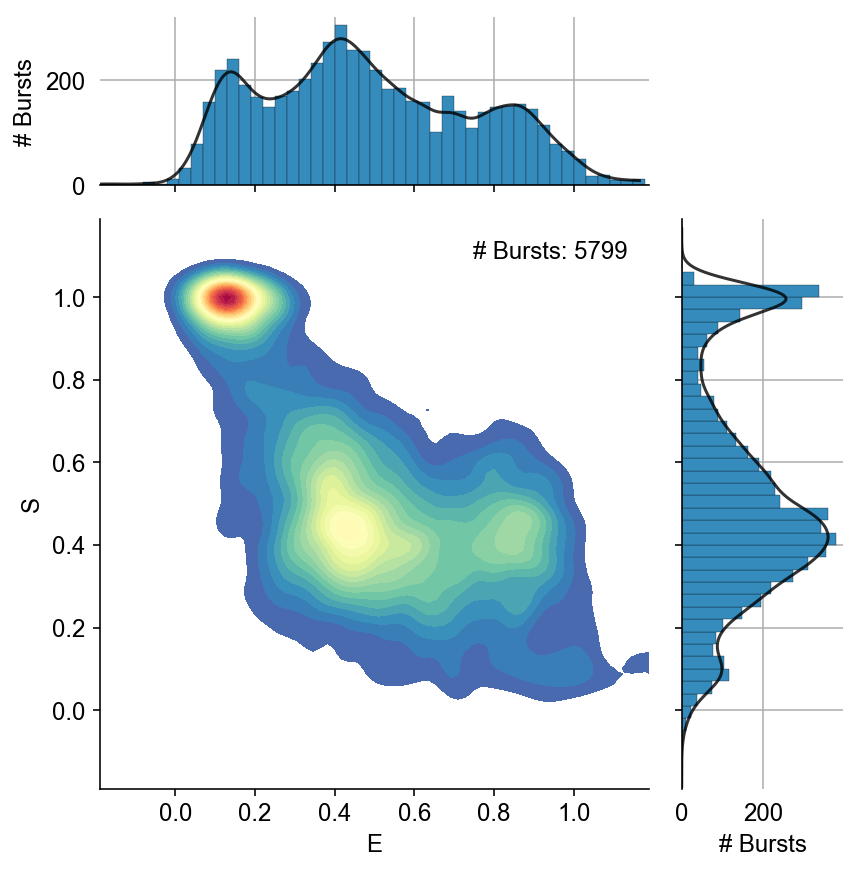

In [14]:
alex_jointplot(ds, kind='kde')

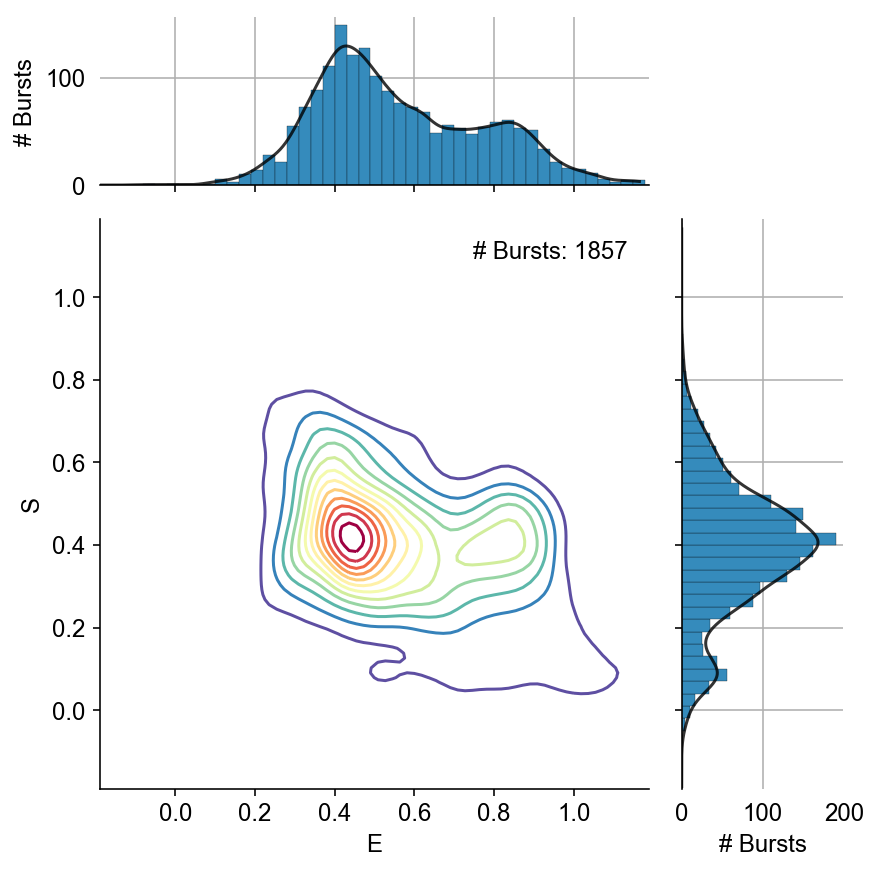

In [15]:
dsf = ds.select_bursts(select_bursts.naa, th1=40)
alex_jointplot(dsf, kind='kde',
               joint_kws={'shade': False, 'n_levels': 12, 'bw': 0.04})

## No marginals

Finally, we can plot only the hexbin 2D histogram without marginals:

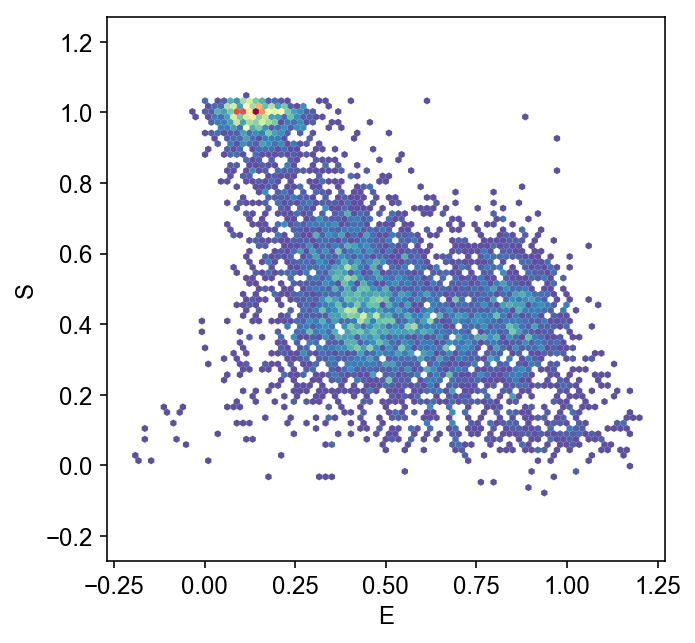

In [16]:
plt.figure(figsize=(5,5))
hexbin_alex(ds)

## Figure layout

You can get an handle of the different axes in the figure for layout customization:

(-0.1, 1.1)

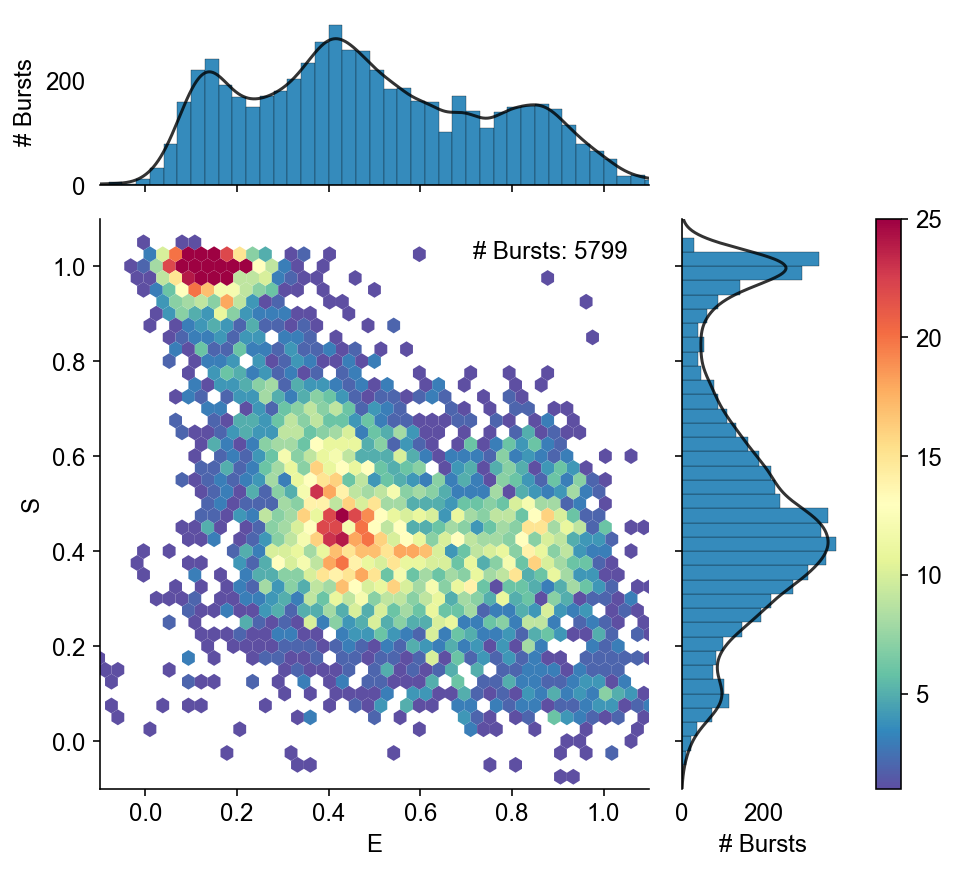

In [17]:
g = alex_jointplot(ds)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)
g.ax_joint.set_xlim(-0.1, 1.1)
g.ax_joint.set_ylim(-0.1, 1.1)

`alex_jointplot` returns `g` which contains the axis handles (`g.ax_join`, `g.ax_marg_x`, `g.ax_marg_y)`.
The object `g` is a [`seaborn.JointGrid`](https://seaborn.pydata.org/generated/seaborn.JointGrid.html).

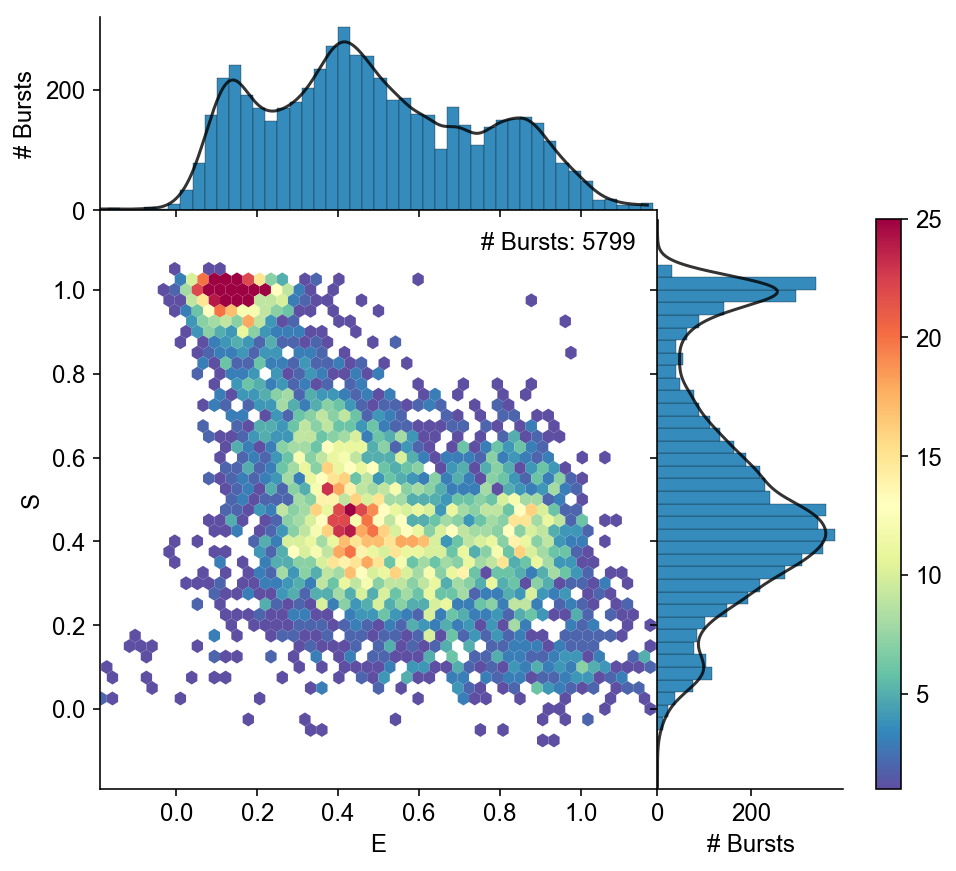

In [18]:
g = alex_jointplot(ds)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)
g.ax_joint.set_xlim(-0.19, 1.19)
g.ax_joint.set_ylim(-0.19, 1.19)
plt.subplots_adjust(wspace=0, hspace=0)
g.ax_marg_y.spines['bottom'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_y.tick_params(reset=True, bottom=True, top=False, right=False, labelleft=False)
g.ax_marg_x.tick_params(reset=True, left=True, top=False, right=False, labelbottom=False)

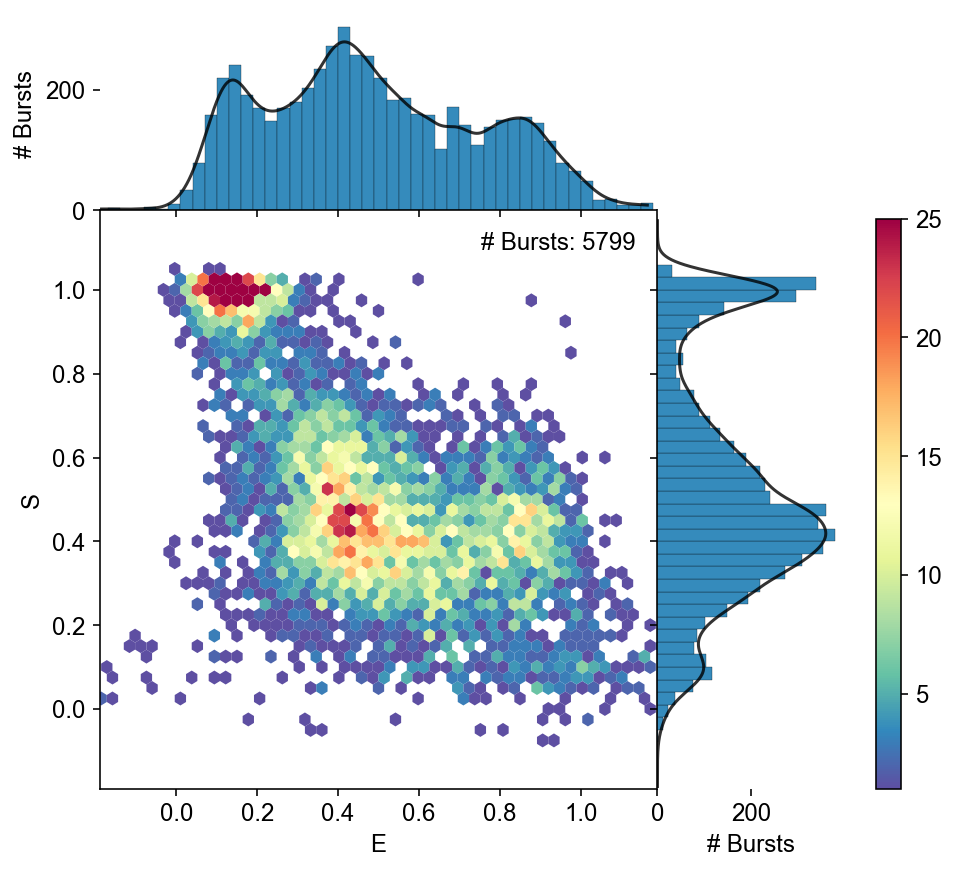

In [19]:
g = alex_jointplot(ds)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)
g.ax_joint.set_xlim(-0.19, 1.19)
g.ax_joint.set_ylim(-0.19, 1.19)
plt.subplots_adjust(wspace=0, hspace=0)
g.ax_marg_y.tick_params(reset=True, bottom=True, top=False, right=False, labelleft=False)
g.ax_marg_x.tick_params(reset=True, left=True, top=False, right=False, labelbottom=False)

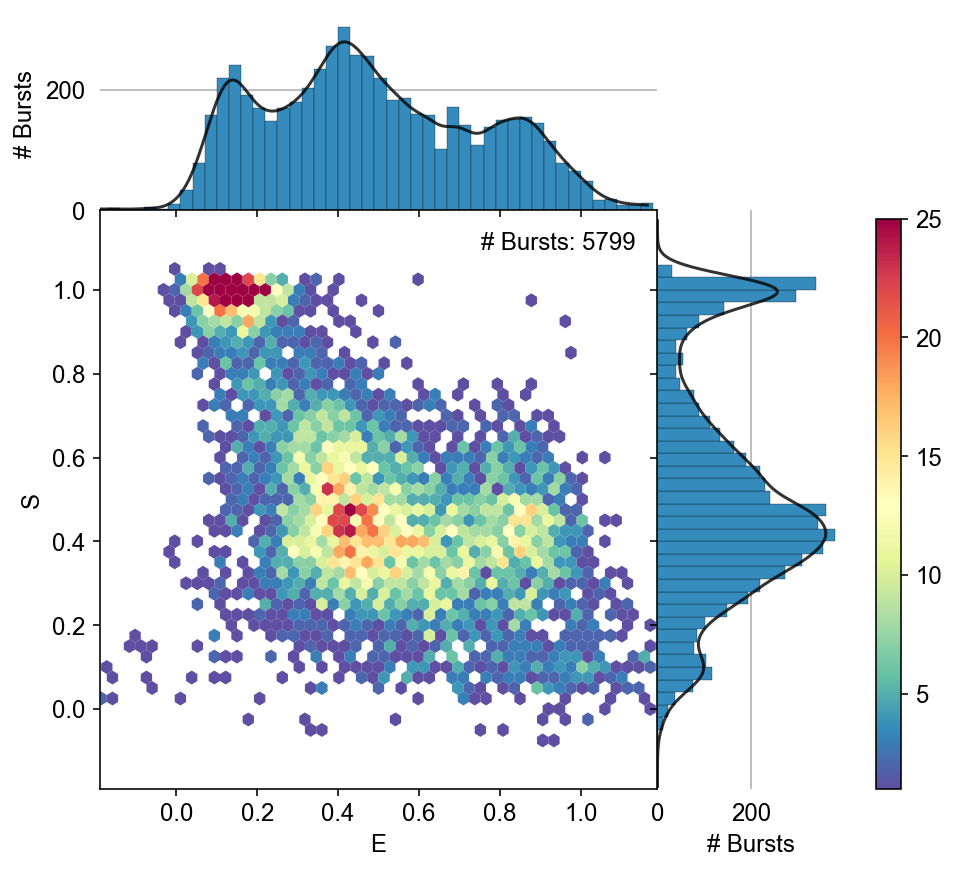

In [20]:
g = alex_jointplot(ds)
g.ax_marg_x.grid(False, axis='x')
g.ax_marg_y.grid(False, axis='y')
g.ax_joint.set_xlim(-0.19, 1.19)
g.ax_joint.set_ylim(-0.19, 1.19)
plt.subplots_adjust(wspace=0, hspace=0)

## Arguments of inner plots

Additional arguments can be passed to the inner or marginal plots passing 
a dictionary to `joint_kws` and `marginal_kws` respectively.

The marginal plots are created by [`hist_burst_data`](http://fretbursts.readthedocs.io/en/latest/plots.html?highlight=hist_burst_data#fretbursts.burst_plot.hist_burst_data) 
which is the same function used to plot standalone *E* and *S* histograms
in FRETBursts. 

For example, we can remove the KDE overlay like this:

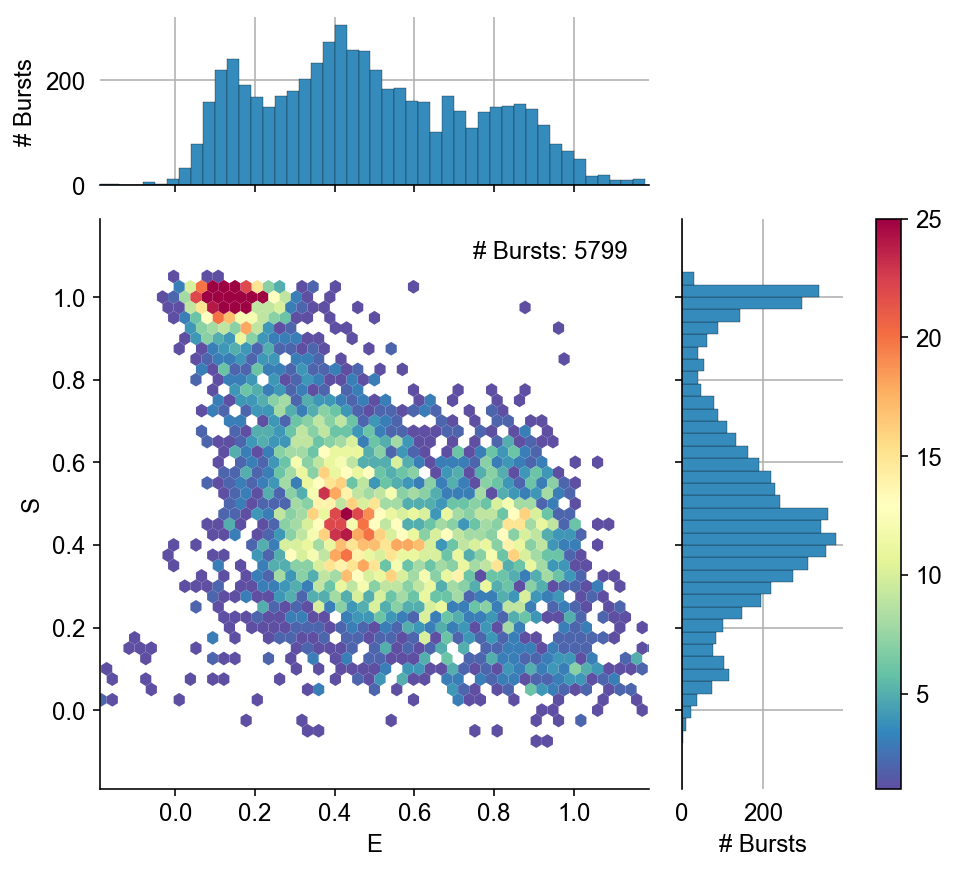

In [21]:
alex_jointplot(ds, marginal_kws={'show_kde': False})

## Interactive plot

In [22]:
from ipywidgets import widgets, interact, interactive, fixed
from IPython.display import display, display_png, display_svg, clear_output
from IPython.core.pylabtools import print_figure

In [23]:
cmaps = ['viridis', 'plasma', 'inferno', 'magma',
         'afmhot', 'Blues', 'BuGn', 'BuPu', 'GnBu', 'YlGnBu',
         'coolwarm', 'RdYlBu', 'RdYlGn', 'Spectral',]# 'icefire']  uncomment if using seaborn 0.8

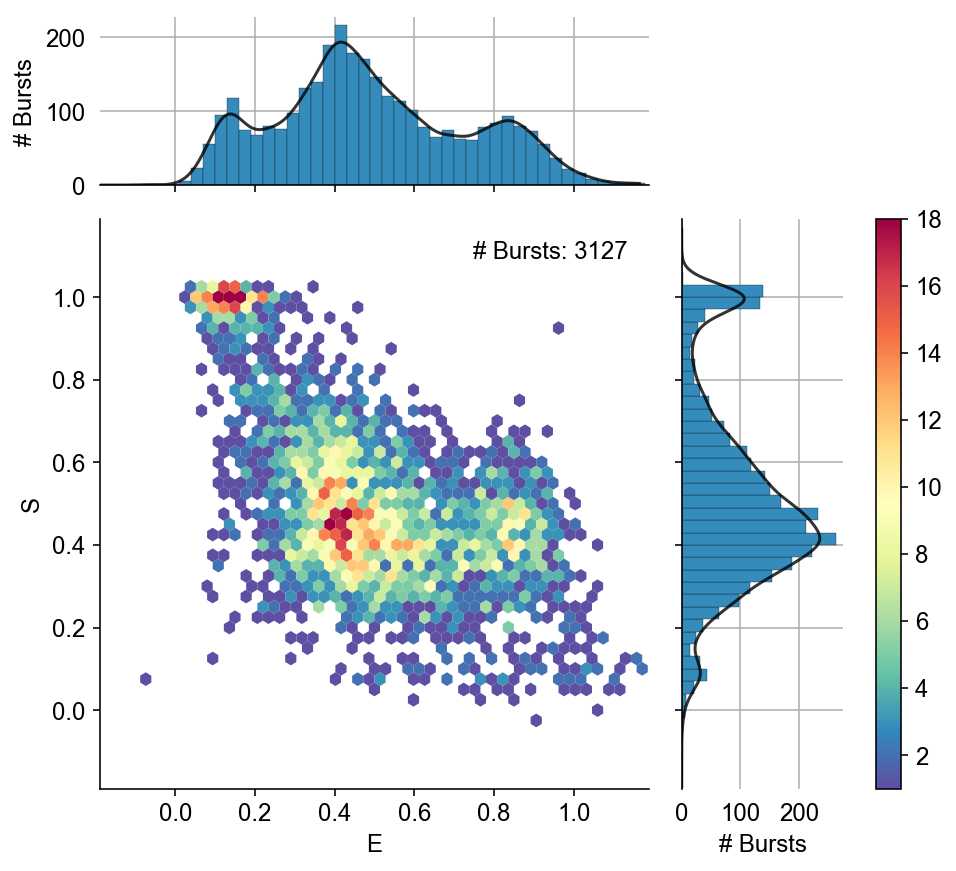

In [24]:
@interact(overlay = widgets.RadioButtons(options=['fit model', 'KDE'], value='KDE'),
          binwidth = widgets.FloatText(value=0.03, min=0.01, max=1),
          bandwidth = widgets.FloatText(value=0.03, min=0.01, max=1),
          gridsize = (10, 100),
          min_size=(10, 500, 5),
          cmap=widgets.Dropdown(value='Spectral', options=cmaps),
          reverse_cmap = True,
          vmax_fret = True,
          )
def plot_(min_size=50, overlay='KDE', binwidth=0.03, bandwidth=0.03, 
          gridsize=50, cmap='Spectral', reverse_cmap=False, 
          vmax_fret=True):
    dx = d.select_bursts(select_bursts.size, add_naa=True, th1=min_size)
    bext.bursts_fitter(dx, 'E', binwidth=binwidth, bandwidth=bandwidth, 
                       model=mfit.factory_three_gaussians())
    bext.bursts_fitter(dx, 'S', binwidth=binwidth, bandwidth=bandwidth, 
                       model=mfit.factory_two_gaussians())    
    
    if reverse_cmap: cmap += '_r'

    if binwidth < 0.01: binwidth = 0.01
    if bandwidth < 0.01: bandwidth = 0.01
    if overlay == 'fit model':
        marginal_kws = dict(binwidth=binwidth, show_model=True, pdf=True, 
                            show_kde=False)
    else:
        marginal_kws = dict(binwidth=binwidth, show_kde=True, 
                            bandwidth=bandwidth)
    alex_jointplot(dx, cmap=cmap, gridsize=gridsize, vmax_fret=vmax_fret, 
                   marginal_kws=marginal_kws,)
    
    fig = gcf()
    plt.close()
    display(fig)

---
**Executed:** Sat Nov 18 15:58:55 2017

**Duration:** 47 seconds.

**Autogenerated from:** [Example - Customize the us-ALEX histogram.ipynb](out/Example - Customize the us-ALEX histogram.ipynb)